**Lab: Topic Modeling and Sentiment Analysis**

Today we're going to cover the code implementation of two processes, Topic Modeling and Sentiment Analysis. Because we're a bit pressed for time, given our need to finish up last week's statistics lesson, we might run through this a bit quick. But I'm going to include all the sample code you might need and resources to look at to run things on your own, if you include these methods in your final project.

First, let's start by loading in some sample texts. I'd like to use some social media data, first, because it can be simpler to work with for these methods, given it's what they were often trained for/on. But then we'll try them out on some literature. So, let's start with some social media data. On my github, I've got an archive of a whole bunch of #MeToo tweets, from back when the Twitter API worked. Let's load those in from github:

In [1]:
import pandas as pd

# GitHub raw file URL
url = "https://raw.githubusercontent.com/TessM2/metooday/main/MeTooDay.xlsx"

# Load the Excel file
df = pd.read_excel(url)

# Display the first few rows
print(df.head())


                                attachments   author_id     conversation_id  \
0                                       NaN  2360595235  923700603317915008   
1                                       NaN   329113171  923700543142338048   
2                                       NaN   344447214  923700348002353024   
3                                       NaN    44484303  923700206604114944   
4  {'media_keys': ['3_923700167399706624']}   551617753  923700171875027968   

                 created_at  \
0  2017-10-26T23:59:20.000Z   
1  2017-10-26T23:59:05.000Z   
2  2017-10-26T23:58:19.000Z   
3  2017-10-26T23:57:45.000Z   
4  2017-10-26T23:57:37.000Z   

                                            entities  geo                  id  \
0  {'hashtags': [{'start': 0, 'end': 6, 'tag': 'M...  NaN  923700603317915008   
1  {'hashtags': [{'start': 116, 'end': 122, 'tag'...  NaN  923700543142338048   
2  {'hashtags': [{'start': 10, 'end': 16, 'tag': ...  NaN  923700348002353024   
3  {'hashtags'

In [2]:
df

,attachments,author_id,conversation_id,created_at,entities,geo,id,likes,likesplusretweets,possibly_sensitive,public_metrics,retweets,text,withheld
0,NaN,2360595235,923700603317915008,2017-10-26T23:59:20.000Z,"{'hashtags': [{'start': 0, 'end': 6, 'tag': 'M...",NaN,923700603317915008,2,2,False,"{'retweet_count': 0, 'reply_count': 2, 'like_c...",0,"#MeToo My rapist said ""You better be quiet or ...",NaN
1,NaN,329113171,923700543142338048,2017-10-26T23:59:05.000Z,"{'hashtags': [{'start': 116, 'end': 122, 'tag'...",NaN,923700543142338048,2,3,False,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",1,Sexual harassment should never be tolerated. I...,NaN
2,NaN,344447214,923700348002353024,2017-10-26T23:58:19.000Z,"{'hashtags': [{'start': 10, 'end': 16, 'tag': ...",NaN,923700348002353024,0,0,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",0,[OPINION] #MeToo: Let's talk about consent htt...,NaN
3,NaN,44484303,923700206604114944,2017-10-26T23:57:45.000Z,"{'hashtags': [{'start': 103, 'end': 109, 'tag'...",NaN,923700206604114944,0,0,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",0,This Gubernatorial forum is bringing tears to ...,NaN
4,{'media_keys': ['3_923700167399706624']},551617753,923700171875027968,2017-10-26T23:57:37.000Z,"{'hashtags': [{'start': 103, 'end': 109, 'tag'...",NaN,923700171875027968,2,4,False,"{'retweet_count': 2, 'reply_count': 0, 'like_c...",2,The October edition checks in on fall sports a...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076,NaN,608727641,923338872267795968,2017-10-26T00:01:56.000Z,"{'hashtags': [{'start': 100, 'end': 106, 'tag'...",NaN,923338872267795968,1,1,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",0,"Shocking, important story on how Russian troll...",NaN
3077,NaN,35892448,923338713282866944,2017-10-26T00:01:18.000Z,"{'hashtags': [{'start': 40, 'end': 46, 'tag': ...",NaN,923338713282866944,0,0,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",0,ABC GMA - Alyssa Milano reacts to viral #MeToo...,NaN
3078,NaN,15783601,923338613617720960,2017-10-26T00:00:54.000Z,"{'mentions': [{'start': 70, 'end': 81, 'userna...",NaN,923338613617720960,0,0,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",0,#MeToo &amp; #HowIWillChange https://t.co/GIyX...,NaN
3079,NaN,2840858953,923338463788915968,2017-10-26T00:00:19.000Z,"{'hashtags': [{'start': 62, 'end': 68, 'tag': ...",NaN,923338463788915968,0,0,False,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",0,Shrouded in shame: Journalist Yousra Elbagir l...,NaN


So, our "df" is MeToo tweets (all from 2017) with the text in the "text" column. Let's also grab a literary text. I've still got James Joyce on the brain, from last week, so let's use Dubliners.

In [20]:
import requests
response = requests.get("https://www.gutenberg.org/cache/epub/2814/pg2814.txt")
html_string = response.text
html_string

'\ufeffThe Project Gutenberg eBook of Dubliners\r\n    \r\nThis ebook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this ebook or online\r\nat www.gutenberg.org. If you are not located in the United States,\r\nyou will have to check the laws of the country where you are located\r\nbefore using this eBook.\r\n\r\nTitle: Dubliners\r\n\r\nAuthor: James Joyce\r\n\r\nRelease date: September 1, 2001 [eBook #2814]\r\n                Most recently updated: May 21, 2021\r\n\r\nLanguage: English\r\n\r\nCredits: David Reed, Karol Pietrzak and David Widger\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK DUBLINERS ***\r\n\r\ncover\r\n\r\n\r\n\r\n\r\nDUBLINERS\r\n\r\nby James Joyce\r\n\r\n\r\nContents\r\n\r\n The Sisters\r\n An Encounter\r\n Araby\r\n Eveline\r\n After the Race\r\n Two 

OK, so df is our metoo tweets, and html_string is Dubliners.

**Topic Modeling**

OK, so let's start with some topic modeling. First, let's review what we learned from the reading, together. Before proceeding, let's make sure we understand:

-What is topic modeling? (and LDA, more specifically)
-How does it work?
-What do the results look like?
-Why are the results different every time?
-What choices need to be made, and what complications might emerge? (e.g., sections)
-What programs are best to use?

I'll answer the last; In general, and in my experience, MALLET (created and maintained by David Mimno) is the best program to use for topic modeling. Other programs exist, and if you ask a chatbot like, e.g., ChatGPT, it might try to get you to use them - for example, it might urge you to use the "gensim" library in Python. In my experience - and a lot of other people's - this works poorly. Some claim that gensim works well with a very large amount of text/docs, but I can't vouch for that.

Mallet can be downloaded online, and run from the command line (remember the command line? this is one of the times you might use it!) in addition to guide to downloadin and running it in Melanie's textbook, you can find a really useful one here: https://programminghistorian.org/en/lessons/topic-modeling-and-mallet. I've used it many times!

If you don't want to run Mallet from the command line, though, you can also run it in Python, using the python "wrapper" (basically, code that allows you to run a non-python process in python) called LittleMallet created by Maria Antoniak.

The problem, however, is that running Mallet requires a few preemptive steps: we need to download mallet, first; and we need to get Java script, to do so. And then we can run mallet in python with the little Mallet wrapper, or from the command line.

Melanie walks you through all of this in her textbook. So, if you plan to use topic modeling long term, I'd suggest going through this process (and I'm happy to hold an extra group office hours session with anyone who wants to do this together, to use topic modeling in your final projects).

For now, though, we're going to do a temporary download of mallet together in colab, to use it. This will not download mallet onto your machine, for long term use. but it will allow you to use it temporarily in this colab notebook:

In [4]:
# Download MALLET (v2.0.8) from the official website
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

# Unzip the downloaded file
!unzip mallet-2.0.8.zip

# Set the MALLET path
import os
mallet_path = "/content/mallet-2.0.8/bin/mallet"
os.environ['MALLET_HOME'] = "/content/mallet-2.0.8"


--2025-03-11 17:24:18--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2025-03-11 17:24:18--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  16.3MB/s    in 0.9s    

2025-03-11 17:24:19 (16.3 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.

In [5]:
#get the little mallet wrapper
!pip install little-mallet-wrapper


In [6]:
#and import it for use
import little_mallet_wrapper as lmw

OK now let's get our documents to go into mallett - all the metoo tweets.  So, let's use our handy tolist function to put the "text" column from our df into a list, and then preprocess the text.

In [7]:
# Convert the "text" column in the DataFrame into a list of documents
documents = df["text"].astype(str).tolist()


Let's check out how many documents are in this list:

In [8]:
len(documents)

3081

Now let's preprocess the text. We can experiment with different ways of preprocessing, and if you run your own topic models, I encourage you to experiment with different modes. But what we should definitely do is lowercase, tokenize (split into tokens) and remove punctuation/extra spaces. Since every tweet in this dataset also says #metoo, we might remove that, since it's in every tweet. However, we might experiment with both removing it and not removing it, to see what kind of results we get.

In [9]:
import re

# Define a function to clean text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"#\S+", "", text)  # Remove hashtags (like #MeToo)
    text = re.sub(r"@\S+", "", text)  # Remove mentions (@username)
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove URLs
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = lmw.process_string(text)  # Tokenization & stopword removal
    return text

# Apply preprocessing to all tweets
documents = df["text"].astype(str).apply(preprocess_text).tolist()

In [10]:
documents

['rapist said better quiet brother hear mum find youve doneshut say',
 'sexual harassment never tolerated wish courage stop serving country',
 'opinion lets talk consent',
 'gubernatorial forum bringing tears eyes current topic sexual violence women',
 'october edition checks fall sports explores thoughts feminism contribution',
 'let told world apart came',
 'starting campaign cause train lives matter well lock pervert trainspotters away without lemon tea',
 'latest discourse daily',
 'due process naming mutually exclusive sahana ghosh conversation kafila',
 'consent dance isnt respecting personal space keeping safe well',
 'hell hath furry like woman scorned said shakespeare imagine millions',
 'iraq catalonia tuesday briefing',
 'hell hath furry like woman scorned said shakespeare imagine millions',
 'closest family member maleampfemale best friends everybody went hard times',
 '',
 'blame god dumped literary agency today',
 'philandering presidents top NUM ugliest first ladies',
 '

what's going on here? what issues do we see and what other claning processes might we want to do?

OK, now let's run the topic model. We can experiment with different numbers of topics - and will do that in a moment - but let's start, for example, with 50. This code will show us the topics by printing out the top 20 words in each.

This is a lightly adapted version of Melanie's code (see her textbook)


In [11]:
import os
from pathlib import Path
import little_mallet_wrapper as lmw

# 🔹 Step 1: Define the number of topics (Changeable)
num_topics = 15  # Adjust as needed

# 🔹 Step 2: Define output directory
output_directory_path = "mallet_output"

# 🔹 Step 3: Ensure the output directory exists
Path(output_directory_path).mkdir(parents=True, exist_ok=True)

# 🔹 Step 4: Define necessary paths for MALLET files
path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{num_topics}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{num_topics}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{num_topics}"

# 🔹 Step 5: Preprocess documents (ensuring they're ready for MALLET)
training_data = [lmw.process_string(doc, numbers="remove") for doc in documents]

# 🔹 Step 6: Save processed training data to a file
with open(path_to_training_data, "w", encoding="utf-8") as f:
    for doc in training_data:
        f.write(doc + "\n")

# 🔹 Step 7: Run MALLET Topic Modeling
lmw.quick_train_topic_model(
    mallet_path,
    output_directory_path,
    num_topics,
    training_data
)

# 🔹 Step 8: Load and print the top 20 words for each topic
topics = lmw.load_topic_keys(path_to_topic_keys)

print("\n🔹 Top 20 Words for Each Topic 🔹\n")
for topic_number, words in enumerate(topics):
    print(f"✨ Topic {topic_number} ✨\n{', '.join(words[:20])}\n")


Importing data...
Complete
Training topic model...
Complete

🔹 Top 20 Words for Each Topic 🔹

✨ Topic 0 ✨
num, help, rape, culture, resources, survivor, must, also, weinstein, next, build, whatäôs, midst, end, call, list, comes, harassmentabuse, facebook, impact

✨ Topic 1 ✨
story, god, thank, calls, protect, victims, via, courageous, shares, pledge, shared, make, campaigns, adland, gallop, warren, elizabeth, article, numbers, statement

✨ Topic 2 ✨
said, like, want, didnt, told, raped, today, twitter, happened, woman, guy, wanted, post, girl, ever, time, dont, boss, tell, moment

✨ Topic 3 ✨
women, hollywood, big, moment, see, think, response, men, via, japanäôs, oughta, abuses, tokyo, decent, read, problem, male, schools, article, must

✨ Topic 4 ✨
latest, daily, thanks, news, flake, movement, jeff, trump, scene, nightlife, vancouver, voice, steady, strong, agenda, named, members, feminist, happens, network

✨ Topic 5 ✨
sexual, harassment, assault, women, via, abuse, men, movement, s

Do these make sense? Let's try again with different numbers of topics (100, 150, etc)? what works best? what would we call the topics?

What other operations could we do? Once we get the topics, we can examine the frequency/proportion of each topic in each document. This means we can also, e.g., sort the topics by frequency across the documents, or examine the documents that are most highly dominated by each topic. Let's do both:

In [12]:
import pandas as pd

# Step 1: Load topic distributions (probability of each topic per document)
topic_distributions = lmw.load_topic_distributions(path_to_topic_distributions)

# Step 2: Find the dominant topic for each document (tweet)
dominant_topics = [dist.index(max(dist)) for dist in topic_distributions]  # Most likely topic per tweet

# Step 3: Create a DataFrame linking topics to tweets
df_topics = pd.DataFrame({"Tweet": df["text"], "Topic": dominant_topics})

# Step 4: Count topic occurrences (how many tweets per topic)
df_topic_counts = df_topics["Topic"].value_counts().reset_index()
df_topic_counts.columns = ["Topic", "Count"]

# Step 5: Sort topics by number of tweets (most to least frequent)
df_topic_counts = df_topic_counts.sort_values(by="Count", ascending=False)

# Step 6: Print topics ranked by frequency
print("\n🔹 Topics Ranked by Frequency 🔹\n")
print(df_topic_counts)

# Step 7: Print the top 5 example tweets for each topic
print("\n🔹 Top 5 Example Tweets for Each Topic 🔹\n")

for topic_num in df_topic_counts["Topic"]:
    print(f"\n✨ Topic {topic_num} ✨ (Top 5 Tweets)\n")

    # Select tweets assigned to this topic
    topic_tweets = df_topics[df_topics["Topic"] == topic_num]["Tweet"]

    # Print the first 5 tweets
    for tweet in topic_tweets.head(5):
        print(f"- {tweet}")

    print("\n" + "-"*80 + "\n")  # Separator for readability



🔹 Topics Ranked by Frequency 🔹

    Topic  Count
0      10    796
1       5    486
2      14    210
3       2    193
4       4    190
5       7    171
6       1    145
7      12    143
8       3    139
9       9    124
10      6    115
11     13    109
12      8     90
13      0     89
14     11     81

🔹 Top 5 Example Tweets for Each Topic 🔹


✨ Topic 10 ✨ (Top 5 Tweets)

- Sexual harassment should never be tolerated. I wish i had had the courage to stop it when I was serving my country. #MeToo
- RT @KeishieMcdaniel: RT @seanseager88: I let go and told the world I'm apart of #MeToo
#Iamhere by @Pink came on. ‚Ä¶ https://t.co/VL5vdKZHCO
- Consent in dance isn't just respecting personal space, but keeping each other safe as well. @SocialDance4you #MeToo https://t.co/g2UDxGypmj
- #Metoo for me, my closest family member, my male&amp;female best friends &amp;  everybody that went through that hard times.
- #RachelMcAdams and #SelmaBlair Speak Out About Another Hollywood Sexual Abuser #MeT

let's use the original dataframe "retweet" counts to find the tweets with the highest retweets and quatify their opics

In [13]:
import pandas as pd

# Step 1: Load topic distributions (probability of each topic per document)
topic_distributions = lmw.load_topic_distributions(path_to_topic_distributions)

# Step 2: Find the dominant topic for each tweet
df["Topic"] = [dist.index(max(dist)) for dist in topic_distributions]  # Assign most likely topic per tweet

# Step 3: Define a threshold for high-retweet tweets (top 10% most retweeted)
threshold = df["retweets"].quantile(0.90)  # Change to 0.95 for top 5%, etc.

# Step 4: Filter tweets that are in the top 10% by retweets
high_retweet_df = df[df["retweets"] >= threshold]

# Step 5: Count topic occurrences in high-retweet tweets
top_topic_counts = high_retweet_df["Topic"].value_counts().reset_index()
top_topic_counts.columns = ["Topic", "Count"]

# Step 6: Print the ranked topics in high-retweet tweets
print("\n🔹 Topics Most Frequent in High-Retweet Tweets 🔹\n")
print(top_topic_counts)



🔹 Topics Most Frequent in High-Retweet Tweets 🔹

    Topic  Count
0      10    110
1       5     91
2      14     28
3       1     26
4       7     19
5       3     18
6      12     17
7       2     16
8       9     16
9       0     13
10     13     10
11      4     10
12     11     10
13      8      9
14      6      9


OK, so thats topic modeling tweets. I purposefully started with this example because the documents are short and of equal length. But novels and literary texts are way more complicated. In your homework (the "xanda" text), you read a bit about a major complication that comes up when topic modeling literary texts - at least in theory. Does anyone remember the issue/the set of decisions that has to be made?

....yes, a question emerges as to what to count as a "document"; so, what concerns come up? what might we count as a document? let's say we were dealing with Dubliners, how might we divide the text into "documents" (based on your "xanda" reading)

Let's look at the text again to get a sense of how we might clean it or want to split it up:

In [21]:
html_string

'\ufeffThe Project Gutenberg eBook of Dubliners\r\n    \r\nThis ebook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this ebook or online\r\nat www.gutenberg.org. If you are not located in the United States,\r\nyou will have to check the laws of the country where you are located\r\nbefore using this eBook.\r\n\r\nTitle: Dubliners\r\n\r\nAuthor: James Joyce\r\n\r\nRelease date: September 1, 2001 [eBook #2814]\r\n                Most recently updated: May 21, 2021\r\n\r\nLanguage: English\r\n\r\nCredits: David Reed, Karol Pietrzak and David Widger\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK DUBLINERS ***\r\n\r\ncover\r\n\r\n\r\n\r\n\r\nDUBLINERS\r\n\r\nby James Joyce\r\n\r\n\r\nContents\r\n\r\n The Sisters\r\n An Encounter\r\n Araby\r\n Eveline\r\n After the Race\r\n Two 

Let's clean all the \n and \r out of teh text. And then let's go with splitting the text up by story, first. But how can we get each story into a separate document?

In [22]:
import pandas as pd
import re

# Step 1: Clean the text (Remove \r and \n)
cleaned_text = html_string.replace("\r", " ").replace("\n", " ")

# Step 2: Define the story titles in uppercase
story_titles = [
    "THE SISTERS", "AN ENCOUNTER", "ARABY", "EVELINE", "AFTER THE RACE",
    "TWO GALLANTS", "THE BOARDING HOUSE", "A LITTLE CLOUD", "COUNTERPARTS",
    "CLAY", "A PAINFUL CASE", "IVY DAY IN THE COMMITTEE ROOM",
    "A MOTHER", "GRACE", "THE DEAD"
]

# Step 3: Use regex to split the text at each story title
pattern = r"(" + "|".join(re.escape(title) for title in story_titles) + r")"
split_text = re.split(pattern, cleaned_text)

# Step 4: Organize stories into a list of dictionaries
stories = []
for i in range(1, len(split_text), 2):  # Step through split_text to get pairs (title, story)
    title = split_text[i].strip()  # Get title
    text = split_text[i + 1].strip() if i + 1 < len(split_text) else ""  # Get corresponding text
    stories.append({"Title": title, "Text": text})

# Step 5: Convert to a DataFrame
df_stories = pd.DataFrame(stories)

# Step 6: Display the DataFrame
print(df_stories.head())  # Shows first few rows


            Title                                               Text
0     THE SISTERS  There was no hope for him this time: it was th...
1    AN ENCOUNTER  It was Joe Dillon who introduced the Wild West...
2           ARABY  North Richmond Street, being blind, was a quie...
3         EVELINE  She sat at the window watching the evening inv...
4  AFTER THE RACE  The cars came scudding in towards Dublin, runn...


In [23]:
df_stories

,Title,Text
0,THE SISTERS,There was no hope for him this time: it was th...
1,AN ENCOUNTER,It was Joe Dillon who introduced the Wild West...
2,ARABY,"North Richmond Street, being blind, was a quie..."
3,EVELINE,She sat at the window watching the evening inv...
4,AFTER THE RACE,"The cars came scudding in towards Dublin, runn..."
5,TWO GALLANTS,The grey warm evening of August had descended ...
6,THE BOARDING HOUSE,Mrs Mooney was a butcher’s daughter. She was a...
7,A LITTLE CLOUD,Eight years before he had seen his friend off ...
8,COUNTERPARTS,"The bell rang furiously and, when Miss Parker ..."
9,CLAY,The matron had given her leave to go out as so...


It looks like we ran into an error with a painful case (the name of the story must have been included, in all caps, in the story). We also now need to clean some extra text out of the last story, the dead, since a bunch of project Gutenberg filler text was included after it (and we split the stories up by finding the title and then including the text that followed up until the next title found). Let's fix both errors.

first let's fix the painful case issue:

In [24]:
import pandas as pd

# Step 1: Find indices of the duplicate rows
painful_case_indices = df_stories[df_stories["Title"] == "A PAINFUL CASE"].index.tolist()

# Step 2: Merge the text from the duplicate rows
merged_text = " ".join(df_stories.loc[painful_case_indices, "Text"].astype(str))

# Step 3: Drop the old duplicate rows
df_stories = df_stories.drop(painful_case_indices).reset_index(drop=True)

# Step 4: Insert the new row at the first duplicate's position
insert_index = min(painful_case_indices)  # Use the first occurrence index
new_row = {"Title": "A PAINFUL CASE", "Text": merged_text}  # Use a dictionary, not a DataFrame

# Step 5: Reinsert the merged row in the original position
df_stories = pd.concat(
    [df_stories.iloc[:insert_index], pd.DataFrame([new_row]), df_stories.iloc[insert_index:]],
    ignore_index=True
)

# Step 6: Verify that there is now only one row for "A PAINFUL CASE"
print(df_stories[df_stories["Title"] == "A PAINFUL CASE"])


             Title                                               Text
10  A PAINFUL CASE  Mr James Duffy lived in Chapelizod because he ...


In [25]:
df_stories

,Title,Text
0,THE SISTERS,There was no hope for him this time: it was th...
1,AN ENCOUNTER,It was Joe Dillon who introduced the Wild West...
2,ARABY,"North Richmond Street, being blind, was a quie..."
3,EVELINE,She sat at the window watching the evening inv...
4,AFTER THE RACE,"The cars came scudding in towards Dublin, runn..."
5,TWO GALLANTS,The grey warm evening of August had descended ...
6,THE BOARDING HOUSE,Mrs Mooney was a butcher’s daughter. She was a...
7,A LITTLE CLOUD,Eight years before he had seen his friend off ...
8,COUNTERPARTS,"The bell rang furiously and, when Miss Parker ..."
9,CLAY,The matron had given her leave to go out as so...


and now let's fix the text of the dead

In [26]:
# Step 1: Locate the row with the title "THE DEAD"
index_dead = df_stories[df_stories["Title"] == "THE DEAD"].index[0]

# Step 2: Get the text of "THE DEAD"
text_dead = df_stories.at[index_dead, "Text"]

# Step 3: Find the position of the phrase "all the living and the dead"
cutoff_position = text_dead.find("all the living and the dead")

# Step 4: Trim everything after the phrase (if the phrase exists)
if cutoff_position != -1:
    df_stories.at[index_dead, "Text"] = text_dead[:cutoff_position + len("all the living and the dead")]

# Step 5: Verify the updated text
print(df_stories.loc[index_dead, "Text"][-500:])  # Print the last 500 characters to check


upon the Bog of  Allen and, farther westward, softly falling into the dark mutinous  Shannon waves. It was falling, too, upon every part of the lonely  churchyard on the hill where Michael Furey lay buried. It lay thickly  drifted on the crooked crosses and headstones, on the spears of the  little gate, on the barren thorns. His soul swooned slowly as he heard  the snow falling faintly through the universe and faintly falling, like  the descent of their last end, upon all the living and the dead


OK, now we can topic model with each story as a document (though it might be advisable to make the documents even smaller units of text). How many topics shoudl we try for first? 50? 100?

In [30]:
import little_mallet_wrapper as lmw
import os
from pathlib import Path

# Step 1: Extract stories into a list
documents = df_stories["Text"].tolist()  # Convert column to list

# Step 2: Preprocess each story (tokenization, lowercase, remove numbers)
training_data = [lmw.process_string(story, numbers="remove") for story in documents]

# and define number of topics
num_topics = 15  # Adjust as needed

# 🔹 Step 2: Define output directory
output_directory_path = "mallet_output"

# 🔹 Step 3: Ensure the output directory exists
Path(output_directory_path).mkdir(parents=True, exist_ok=True)

# 🔹 Step 4: Define necessary paths for MALLET files
path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{num_topics}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{num_topics}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{num_topics}"

# 🔹 Step 5: Preprocess documents (ensuring they're ready for MALLET)
training_data = [lmw.process_string(doc, numbers="remove") for doc in documents]

# 🔹 Step 6: Save processed training data to a file
with open(path_to_training_data, "w", encoding="utf-8") as f:
    for doc in training_data:
        f.write(doc + "\n")

# 🔹 Step 7: Run MALLET Topic Modeling
lmw.quick_train_topic_model(
    mallet_path,
    output_directory_path,
    num_topics,
    training_data
)

# 🔹 Step 8: Load and print the top 20 words for each topic
topics = lmw.load_topic_keys(path_to_topic_keys)

print("\n🔹 Top 20 Words for Each Topic 🔹\n")
for topic_number, words in enumerate(topics):
    print(f"✨ Topic {topic_number} ✨\n{', '.join(words[:20])}\n")

Importing data...
Complete
Training topic model...
Complete

🔹 Top 20 Words for Each Topic 🔹

✨ Topic 0 ✨
corley, lenehan, street, walked, girls, woman, friend, bit, seen, ginger, takes, tram, plate, mac, peas, beer, merrion, pull, job, close

✨ Topic 1 ✨
aunt, polly, mooney, eliza, cotter, done, children, church, knew, james, jack, father, nights, bed, woman, nannie, questions, priest, snuff, chair

✨ Topic 2 ✨
would, night, could, life, house, towards, first, used, home, away, felt, along, still, every, knew, seemed, saw, stood, evening, hand

✨ Topic 3 ✨
said, one, little, man, like, good, asked, face, know, old, well, room, would, back, two, head, time, see, made, come

✨ Topic 4 ✨
dublin, sinico, duffy, death, deceased, city, lived, cold, railway, engine, paragraph, husband, desk, daughter, memory, read, blame, stated, lonely, park

✨ Topic 5 ✨
gabriel, aunt, kate, miss, julia, jane, mary, browne, malins, freddy, ivors, arcy, gretta, ladies, snow, conroy, really, bartell, lily, pi

Do our results make sense? Any more data cleaning required? etc.

How else might we split the text? what other steps might we take?
Quinn D shows a method for splitting by either 100 characters and/or paragraphs. Paragraphs make sense as a way to split things, but in the dead they are likely very short.

For quinn dombrowski's sample code splitting things up by paragraphs and/or 100 characters (or so) see the course reading https://datasittersclub.github.io/site/dsc20.html

Her method is worth trying out on your own if you're topic modeling novels. For your reference here's her sample code (below)


And here's her description of what it does:

"I ended up writing a short script to split my text up and match up information between babysitter narrators, chapters, and text. The function that’s probably the most reusable here is split_text_into_paragraph_chunks, which looks for places where a new paragraph starts (that is, where someone left a blank line between lines of text) to split text up, combining together shorter paragraphs into single passages until they exceed 100 words together."

This wouldn't quite work for our Dubliners text, since there are no blank lines to split paragraphs. But we might come up with a similar way of chunking it by paragraph.

In [ ]:
import csv
import os
import re

import nltk


CHUNK_SIZE = 100 # we keep adding paragraphs until we exceed 100 words
METADATA_PATH = "dsc_metadata.tsv"
DATA_PATH = "txt/"
OUT_FILE = "dsc_chunks_by_chapter_and_narrator.tsv"


# Help match metadata from filenames to narrators
def make_file_to_babysitter_dict(metadata_file):
    with open(metadata_file) as f:
        reader = csv.DictReader(f, delimiter="\t")
        rows = [r for r in reader]
    for row in rows:
        row["file_prefix"] = re.sub(r"(-s)?.txt", "", row["filename"])
    file_to_babysitter = {r["file_prefix"]: r["narrator"] for r in rows}
    return file_to_babysitter


# Get narrator and chapter information for each chapter file
def get_metadata_from_filename(fname, file_to_babysitter):
    file_prefix = re.sub(r"_[0-9]+.txt", "", fname)
    narrator = file_to_babysitter[file_prefix]
    chapter_number = re.search(r"_([0-9]+).txt", fname).group(1)
    return (file_prefix, int(chapter_number), narrator, fname)


# Split the text of a chapter into CHUNK_SIZE-word-ish chunks. Chunks should
# never split up a paragraph.
def split_text_into_paragraph_chunks(text):
    paragraphs = text.split("\n\n")
    chunks = []
    chunk_so_far = ""
    chunk_tokens = 0
    for p in paragraphs:
        chunk_so_far += p.strip().replace("\n", " ")
        n_tokens = len(nltk.word_tokenize(p))
        chunk_tokens += n_tokens
        if chunk_tokens >= CHUNK_SIZE:
            chunks.append(chunk_so_far)
            chunk_so_far = ""
            chunk_tokens = 0
        else:
            chunk_so_far += " "
    if chunk_tokens > 0:
        chunks.append(chunk_so_far)
    return chunks


# Write out into a MALLET-friendly TSV file with the following row format
# (with four spaces indicating a tab):
# [filename]-[chunk #]    [narrator]_[chapter #]    [text]
def write_chunked_csv(metadata_listing):
    with open(OUT_FILE, 'w') as wf:
        for pre, ch, nar, fname in metadata_listing:
            with open(os.path.join(DATA_PATH, fname)) as chapter_file:
                chapter_text = chapter_file.read()
                chunks = split_text_into_paragraph_chunks(chapter_text)
            for i, chunk in enumerate(chunks):
                wf.write("{}-{}\t{}_{}\t{}\n".format(fname, i, nar, ch, chunk))


def main():
    file_to_babysitter = make_file_to_babysitter_dict(METADATA_PATH)
    metadata_list = [get_metadata_from_filename(fname, file_to_babysitter)
                     for fname in os.listdir(DATA_PATH)
                     if fname.endswith(".txt")]
    write_chunked_csv(metadata_list)


**Sentiment Analysis**

Review:
What is sentiment analysis?
How does it work? (words scores vs. other methods)
What are different types/methods?
  -VADER (word scores, pos and neg, not lit specific)
  -Syuzhet (word scores, pos and neg, trained on literature - note that this is in R, a different programming language from the one we learned, Python)
  -NRC lexicon (word scores, not just pos and neg also "anger," "fear," "surprise"
  -Custom methods with classification/word embedding etc
Pitfalls? Complications?

Pause for discussion of reading: Sentiment Analysis and the Sentimental Novel
p. 417-18 key example

If you plan to use SA in your final project or in future, I highly recommend also reading the "DataSitters Club" essay on it (same source as the topic modeling essay we read) by Quinn Dombrownski and Katherine Bowers: https://datasittersclub.github.io/site/dsc11.html




Let's try sentiment analysis with Vader. First, we need to download a language analysis program called nltk - sort of like spacy, but with a different set of functions

In [1]:
!pip install nltk


Next we need to import nlt, download its pgoram form sentiment analysis, download the Vader lexicon, more specifically, and initialize a function for sentiment analysis using it:

In [2]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download("vader_lexicon")

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [3]:
# Sample sentence
sentence = "Call me Ishmael."

# Get sentiment scores
sentiment = sia.polarity_scores(sentence)

# Print the sentiment breakdown
print(sentiment)


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


we get four scores, neg, neu, pos, and compound for the sentence. what does each mean? what data format is this, that they arrive in?

Answers:

The pos, neg, neu are proportions of the words in the sentence belonging to each category (as previously labeled), and weighted by the strengths of the scores - they add up to one.

The compound score is not just a simple average of the neg, neu, and pos scores. Instead, it is a normalized score that represents the overall sentiment of the sentence.

How is the Compound Score Calculated?
It sums up the sentiment scores of individual words.
Then applies a normalization formula to scale it between -1 (most negative) to +1 (most positive).

So a sentiment compound score for a sentence less than -0.5 is v negative, more than 0.5 is v positive, and between is more neutral (leaning one way or other)

All of this is presented in a dictionary format. To check this:

In [7]:
type(sentiment)

dict

Let's try a longer sentence with mixed emotions:

In [5]:
long_sentence = "I absolutely love the way the sun rises over the ocean, but I hate waking up early and feeling exhausted all day."


In [6]:
sentiment = sia.polarity_scores(long_sentence)
print(sentiment)


{'neg': 0.288, 'neu': 0.556, 'pos': 0.156, 'compound': -0.7007}


What if I want to see individual word scores?

In [8]:


# Tokenize sentence and get sentiment scores for each word
word_scores = {word: sia.polarity_scores(word)['compound'] for word in long_sentence.split()}

# Print the sentiment scores for each word
print(word_scores)


{'I': 0.0, 'absolutely': 0.0, 'love': 0.6369, 'the': 0.0, 'way': 0.0, 'sun': 0.0, 'rises': 0.0, 'over': 0.0, 'ocean,': 0.0, 'but': 0.0, 'hate': -0.5719, 'waking': 0.0, 'up': 0.0, 'early': 0.0, 'and': 0.0, 'feeling': 0.128, 'exhausted': -0.3612, 'all': 0.0, 'day.': 0.0}


again, our ouput comes in dictionary form. what if we wanted to make this dictionary a dataframe?

In [9]:
#if you havent already, though we have, Pandas
import pandas as pd

# Convert dictionary to DataFrame
df_word_scores = pd.DataFrame(word_scores.items(), columns=["Word", "Sentiment Score"])

# Display the DataFrame
print(df_word_scores)


          Word  Sentiment Score
0            I           0.0000
1   absolutely           0.0000
2         love           0.6369
3          the           0.0000
4          way           0.0000
5          sun           0.0000
6        rises           0.0000
7         over           0.0000
8       ocean,           0.0000
9          but           0.0000
10        hate          -0.5719
11      waking           0.0000
12          up           0.0000
13       early           0.0000
14         and           0.0000
15     feeling           0.1280
16   exhausted          -0.3612
17         all           0.0000
18        day.           0.0000


What about getting sentiment scores for multiple sentences? If we have a text with many sentences, we might want to split it up by sentence and get sentiment scores for each:

In [10]:
moby_dick_text = """Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.
It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people's hats off—then, I account it high time to get to sea as soon as I can.
"""


In [13]:
#download a module from nltk to split text into sentences (at periods, more or less)

from nltk.tokenize import sent_tokenize

#for colab we also need to do this, but might not in jupyter (colab will give you an error message telling you to do this, in the next cell, if you dont)
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [14]:
#apply go our moby_dick_text

# Split text into sentences
sentences = sent_tokenize(moby_dick_text)

# Print the split sentences
print(sentences)

['Call me Ishmael.', 'Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.', 'It is a way I have of driving off the spleen and regulating the circulation.', "Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people's hats off—then, I account it high time to get to sea as soon as I can."]


In [15]:
# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each sentence
for sentence in sentences:
    sentiment = sia.polarity_scores(sentence)
    print(f"Sentence: {sentence}")
    print(f"Sentiment Scores: {sentiment}\n")


Sentence: Call me Ishmael.
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sentence: Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world.
Sentiment Scores: {'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'compound': -0.527}

Sentence: It is a way I have of driving off the spleen and regulating the circulation.
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Sentence: Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people's hats off

In [16]:
import pandas as pd

# Store results in a list of dictionaries
sentiment_data = []
for sentence in sentences:
    sentiment = sia.polarity_scores(sentence)
    sentiment["sentence"] = sentence  # Add sentence text
    sentiment_data.append(sentiment)

# Convert to DataFrame
df_sentiments = pd.DataFrame(sentiment_data)

# Display the DataFrame
print(df_sentiments)


     neg    neu    pos  compound  \
0  0.000  1.000  0.000    0.0000   
1  0.118  0.882  0.000   -0.5270   
2  0.000  1.000  0.000    0.0000   
3  0.070  0.825  0.105    0.2732   

                                            sentence  
0                                   Call me Ishmael.  
1  Some years ago—never mind how long precisely—h...  
2  It is a way I have of driving off the spleen a...  
3  Whenever I find myself growing grim about the ...  


In [17]:
import pandas as pd

# Store results in a list of dictionaries
sentiment_data = []
for sentence in sentences:
    sentiment = sia.polarity_scores(sentence)
    sentiment["sentence"] = sentence  # Add sentence text
    sentiment_data.append(sentiment)

# Convert to DataFrame
df_sentiments = pd.DataFrame(sentiment_data)

# Display the DataFrame
print(df_sentiments)


     neg    neu    pos  compound  \
0  0.000  1.000  0.000    0.0000   
1  0.118  0.882  0.000   -0.5270   
2  0.000  1.000  0.000    0.0000   
3  0.070  0.825  0.105    0.2732   

                                            sentence  
0                                   Call me Ishmael.  
1  Some years ago—never mind how long precisely—h...  
2  It is a way I have of driving off the spleen a...  
3  Whenever I find myself growing grim about the ...  


We can even make a mini graph charting the change in the sentiments over time; this forms the basis of plot analysis,for some researchers, though with many caveats (we have to think carefully about how something like this might correspond to plot).

For a full book that considers the application of mapping sentiment scores over time in a text to mapping plot, see Katherine Elkins' The Shape of Stories

Here's code that will extract just the compound scores from the sentences in our moby dick string and then plot them over time:

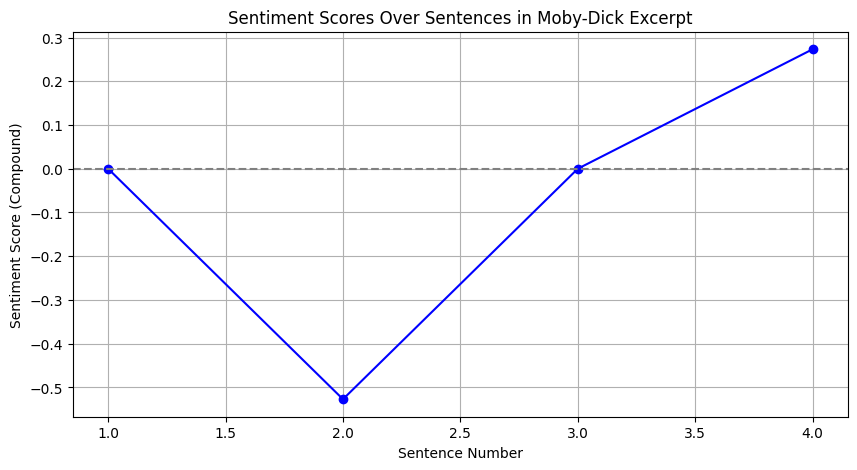

In [18]:
import matplotlib.pyplot as plt

# Step 1: Extract sentence indices for the x-axis
sentence_indices = list(range(1, len(sentences) + 1))

# Step 2: Get compound sentiment scores for each sentence
compound_scores = [sia.polarity_scores(sentence)["compound"] for sentence in sentences]

# Step 3: Create the plot
plt.figure(figsize=(10, 5))
plt.plot(sentence_indices, compound_scores, marker="o", linestyle="-", color="blue")

# Step 4: Add labels and title
plt.xlabel("Sentence Number")
plt.ylabel("Sentiment Score (Compound)")
plt.title("Sentiment Scores Over Sentences in Moby-Dick Excerpt")

# Step 5: Add a horizontal line at 0 (neutral sentiment)
plt.axhline(y=0, color="gray", linestyle="--")

# Step 6: Show the grid and display the plot
plt.grid()
plt.show()


OK let's try this with a longer text. We still have the text of James Joyces' the dead. What would this look like?

This code is going to assume al the packages (pandas, nltk, matplotlib) are already loaded in but if you wanted to run it separately from this notebook you'd need to go back and do all that loading too

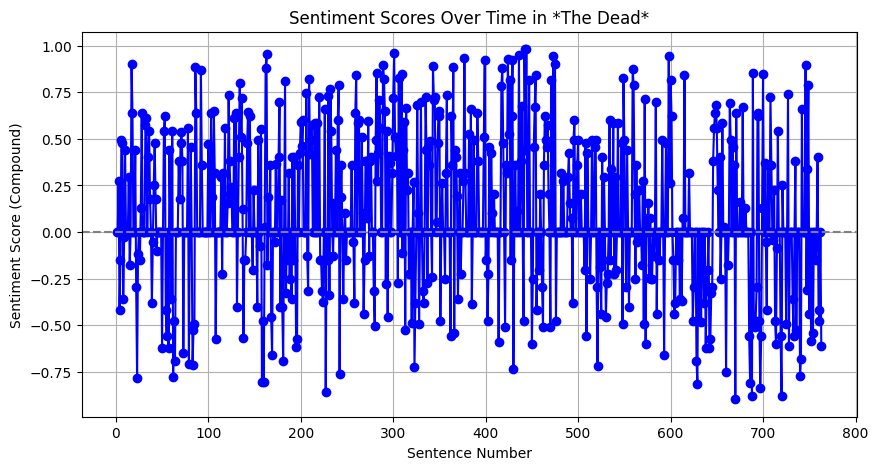

In [27]:


# Step 1: Extract the text of "THE DEAD" from df_stories
the_dead_text = df_stories.loc[df_stories["Title"] == "THE DEAD", "Text"].values[0]  # Get the text

# Step 2: Tokenize the text into sentences
sentences = sent_tokenize(the_dead_text)

# Step 3: Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Step 4: Analyze sentiment for each sentence
sentiment_data = []
for sentence in sentences:
    sentiment = sia.polarity_scores(sentence)
    sentiment["sentence"] = sentence
    sentiment_data.append(sentiment)

# Convert to DataFrame
df_sentiments = pd.DataFrame(sentiment_data)

# Step 5: Extract sentence indices and compound scores for plotting
sentence_indices = list(range(1, len(sentences) + 1))
compound_scores = df_sentiments["compound"].tolist()

# Step 6: Plot sentiment scores over sentences
plt.figure(figsize=(10, 5))
plt.plot(sentence_indices, compound_scores, marker="o", linestyle="-", color="blue")

# Labels and title
plt.xlabel("Sentence Number")
plt.ylabel("Sentiment Score (Compound)")
plt.title("Sentiment Scores Over Time in *The Dead*")
plt.axhline(y=0, color="gray", linestyle="--")  # Neutral line
plt.grid()

# Show the plot
plt.show()


Hm, that's a lot. Are there trends? what if we zoom in? See Kate Elkins' book for more discussion!

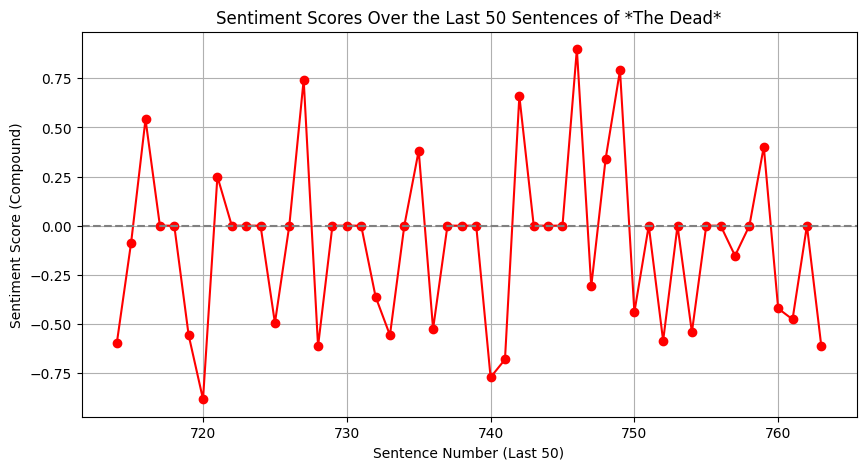

In [28]:
# Step 1: Select the last 50 sentences
last_50_sentences = sentences[-50:]

# Step 2: Extract corresponding sentiment scores
last_50_compound_scores = compound_scores[-50:]

# Step 3: Create a new sentence index for the last 50 sentences
last_50_indices = list(range(len(sentences) - 49, len(sentences) + 1))  # Maintain numbering

# Step 4: Plot sentiment scores for the last 50 sentences
plt.figure(figsize=(10, 5))
plt.plot(last_50_indices, last_50_compound_scores, marker="o", linestyle="-", color="red")

# Labels and title
plt.xlabel("Sentence Number (Last 50)")
plt.ylabel("Sentiment Score (Compound)")
plt.title("Sentiment Scores Over the Last 50 Sentences of *The Dead*")
plt.axhline(y=0, color="gray", linestyle="--")  # Neutral sentiment line
plt.grid()

# Show the plot
plt.show()


Looks like there's a local peak at sentences 740-50. If you know the famous end of the Dead, any guesses? let's see what those sentences are, about 740-750

In [29]:
# Step 1: Extract sentences 740-750 (adjust for Python indexing)
start_index = 739  # Sentence 740 (since Python uses 0-based indexing)
end_index = 750    # Sentence 750

# Step 2: Print the selected sentences
for i, sentence in enumerate(sentences[start_index:end_index], start=740):
    print(f"Sentence {i}: {sentence}\n")


Sentence 740: The blinds would be drawn down and Aunt Kate would be sitting beside  him, crying and blowing her nose and telling him how Julia had died.

Sentence 741: He  would cast about in his mind for some words that might console her, and  would find only lame and useless ones.

Sentence 742: Yes, yes: that would happen very  soon.

Sentence 743: The air of the room chilled his shoulders.

Sentence 744: He stretched himself  cautiously along under the sheets and lay down beside his wife.

Sentence 745: One by  one they were all becoming shades.

Sentence 746: Better pass boldly into that other  world, in the full glory of some passion, than fade and wither dismally  with age.

Sentence 747: He thought of how she who lay beside him had locked in her  heart for so many years that image of her lover’s eyes when he had told  her that he did not wish to live.

Sentence 748: Generous tears filled Gabriel’s eyes.

Sentence 749: He had never felt like that  himself towards any woman but h